In [102]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error , r2_score
import warnings
warnings.filterwarnings('ignore',category=UserWarning)
%matplotlib inline

In [103]:
filepath = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-Coursera/laptop_pricing_dataset_mod2.csv"

In [104]:
df = pd.read_csv(filepath, header=0)

In [105]:
df.head(5)

,Unnamed: 0.1,Unnamed: 0,Manufacturer,Category,GPU,OS,CPU_core,Screen_Size_inch,CPU_frequency,RAM_GB,Storage_GB_SSD,Weight_pounds,Price,Price-binned,Screen-Full_HD,Screen-IPS_panel
0,0,0,Acer,4,2,1,5,14.0,0.551724,8,256,3.52800,978,Low,0,1
1,1,1,Dell,3,1,1,3,15.6,0.689655,4,256,4.85100,634,Low,1,0
2,2,2,Dell,3,1,1,7,15.6,0.931034,8,256,4.85100,946,Low,1,0
3,3,3,Dell,4,2,1,5,13.3,0.551724,8,128,2.69010,1244,Low,0,1
4,4,4,HP,4,2,1,7,15.6,0.620690,8,256,4.21155,837,Low,1,0


# Single Linear Regression


In [106]:
lm = LinearRegression()
x = df[['CPU_frequency']]
y = df['Price']
lm.fit(x, y)

yhat = lm.predict(x)

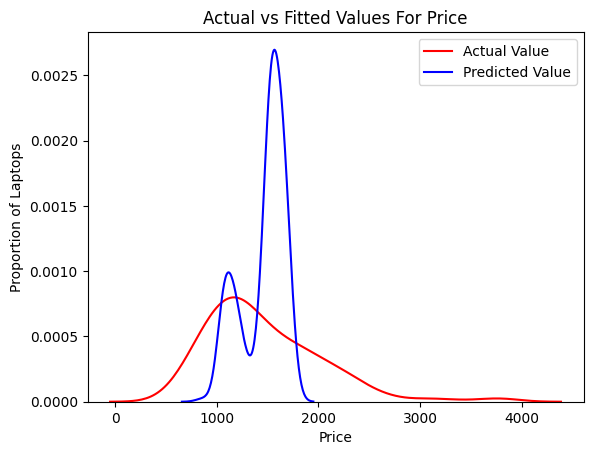

In [107]:
ax1 = sns.kdeplot(df["Price"], color="r", label="Actual Values")
sns.kdeplot(yhat, color="b", label="Fitted Values", ax=ax1)


plt.title("Actual vs Fitted Values For Price")
plt.xlabel("Price")
plt.ylabel("Proportion of Laptops")
plt.legend(["Actual Value", "Predicted Value"])
plt.show()

In [108]:
mse = mean_squared_error(df["Price"], yhat)
r_squared = lm.score(x, y)

print(f"The Mean Squared Error of Price and Predicted Value is {mse}")
print(f"The R-Square of Linear regression is {r_squared}")

The Mean Squared Error of Price and Predicted Value is 284583.4405868629
The R-Square of Linear regression is 0.1344436321024326


# Multiple Linear Regression


In [109]:
lm1 = LinearRegression()
z = df[["CPU_frequency", "RAM_GB", "Storage_GB_SSD",
       "CPU_core", "OS", "GPU", "Category"]]
y = df["Price"]

lm1.fit(z, y)
yhat = lm1.predict(z)

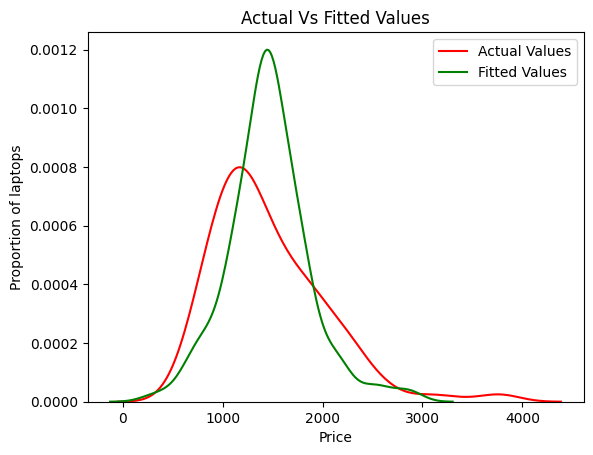

In [110]:
ax2 = sns.kdeplot(df["Price"], color="r", label="Actual Values")
sns.kdeplot(yhat, color="g", label="Fitted Values", ax=ax2)

plt.title("Actual Vs Fitted Values")
plt.xlabel("Price")
plt.ylabel("Proportion of laptops")
plt.legend(["Actual Values", "Fitted Values"])
# plt.show()

In [111]:
mse = mean_squared_error(df["Price"], yhat)
print(f"THE Mean Squared Error is {mse}")

r_squared = lm.score(x, y)
print(f"The R_Squared for Linear Regression is {r_squared}")

THE Mean Squared Error is 161680.57263893107
The R_Squared for Linear Regression is 0.1344436321024326


# Polynomial Regression


In [112]:
x = x.to_numpy().flatten()
f1 = np.polyfit(x, y, 1)
p1 = np.poly1d(f1)

f2 = np.polyfit(x, y, 3)
p2 = np.poly1d(f2)

f3 = np.polyfit(x, y, 5)
p3 = np.poly1d(f3)

In [113]:
def PlotPolly(model, independent_variable, dependent_variabble, Name):
    x_new = np.linspace(independent_variable.min(),
                        independent_variable.max(), 100)
    y_new = model(x_new)

    plt.plot(independent_variable, dependent_variabble, '.', x_new, y_new, '-')
    plt.title(f'Polynomial Fit for Price ~ {Name}')
    ax = plt.gca()
    ax.set_facecolor((0.898, 0.898, 0.898))
    fig = plt.gcf()
    plt.xlabel(Name)
    plt.ylabel('Price of laptops')

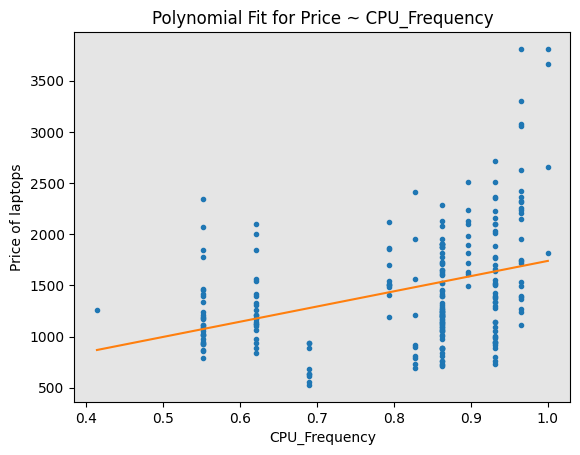

In [114]:
PlotPolly(p1, x, y, "CPU_Frequency")

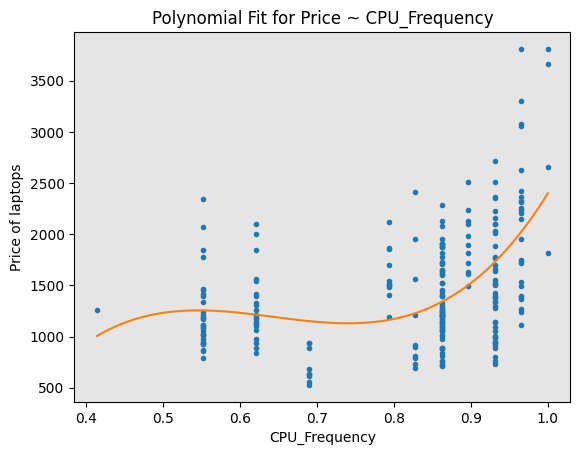

In [116]:
PlotPolly(p2, x, y, "CPU_Frequency")

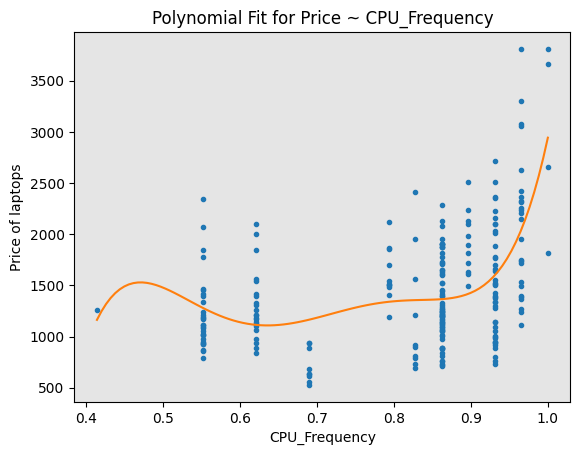

In [117]:
PlotPolly(p3, x, y, "CPU_Frequency")

In [122]:
r_squared_1 = r2_score(y, p1(x))
print(
    f"The R_squared for 1st degree Polynomial is {r_squared_1} \n And the Mean Squared Error is {mean_squared_error(y,p1(x))}")

r_squared_3 = r2_score(y, p2(x))
print(
    f"The R_squared for 3rd degree Polynomial is {r_squared_3} \n And the Mean Squared Error is {mean_squared_error(y,p2(x))}")

r_squared_5 = r2_score(y, p3(x))
print(
    f"The R_squared for 5th degree Polynomial is {r_squared_5} \n And the Mean Squared Error is {mean_squared_error(y,p3(x))}")

The R_squared for 1st degree Polynomial is 0.1344436321024326 
 And the Mean Squared Error is 284583.4405868629
The R_squared for 3rd degree Polynomial is 0.26692640796531053 
 And the Mean Squared Error is 241024.86303848788
The R_squared for 5th degree Polynomial is 0.3030822706442695 
 And the Mean Squared Error is 229137.29548057468


# Pipeline


In [123]:
input = [("Scale", StandardScaler()), ("Polynomial", PolynomialFeatures(
    include_bias=False)), ("model", LinearRegression())]
pipe = Pipeline(input)

z = z.astype(float)
pipe.fit(z, y)
ypipe = pipe.predict(z)

In [125]:
mse = mean_squared_error(y, ypipe)
print("The mean squared is ", mse)

r_squared = r2_score(y, ypipe)
print("The R_squared is ", r_squared)

The mean squared is  120595.61825409257
The R_squared is  0.6332101927465681
